
1. Define assets, initial cash, weight per asset, benchmark, download starting date and live portfolio start date.
2. We download the values.
3. We assign the initial investment and weight per asset
4. We prepare the initial shares per asset depending on the assigned weight
5. We perform the rebalancing engine (daily, monthly or yearly) read in the intro.
6. We calculate the metrics and values ​​of the portfolio and variation in weights
7. We visualize
8. We carry out the study in pyfolio for the strategy. We need to localize timezones for this example.


In [2]:
# Selecting libraries
import quandl
import pandas as pd
import numpy as np 
import pyfolio as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import decimal
from pandas_datareader import data as pdr
import datetime

quandl.ApiConfig.api_key = "c_hn7eHfgo1xuue87yZX"

/home/codespace/.python/current/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
# Define the assets and key initial metrics as investment amount to generate a portfolio

stocks = ['Market Neutral', 'Last' ]  # Assets in the portfolio
portfolio_value = 1        # Initial Portfolio Value 
long_start = 0.25          # Long Ratio
long_max = 0.5
long_min = 0.1
weights = [1 - long_start , long_start]          # Weight Allocation per asset

asset = 'BITFINEX/ETHUSD'                    # Which is your benchmark? ETHUSD

start = '2019-01-01'
end = datetime.datetime.now()

start_date = '2010-01-01'              # Start date for asset data download
live_date = '2020-01-01'               # Portfolio LIVE start date (for analytics)


# Warning handling
if len(weights) != len(stocks):
    print(sum((np.array(weights))))
    print('Number of Asset does not match weight allocated')
    
if sum((np.array(weights))) != 1.0:
    print(sum((np.array(weights))))
    print('Weight could not be allocated properly, make sure they sum 1.0')


In [4]:
# Download data, clean and isolate values for calculation
# If you use other data source, make sure the format is the same than stock_data.head() on next cell. Check dtypes by stock_data.info()

df = quandl.get(asset, authtoken="c_hn7eHfgo1xuue87yZX", start_date = start, end_date = end)
df = df.dropna()

df.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2019-01-01,148.151924,134.68,144.095,144.100000,144.09,144.10,389440.169530
2019-01-02,163.670000,143.86,160.745,160.745799,160.74,160.75,563365.913728
2019-01-04,162.400000,149.78,158.990,158.990000,158.98,159.00,552450.438035
2019-01-05,167.000000,155.00,158.435,158.110000,158.43,158.44,499868.907925
2019-01-06,165.860000,152.59,160.795,160.610000,160.79,160.80,506537.663913


In [5]:
r = 0.4

portfolio_values = [ 100 * (1 + r/365)**(t) for t in range(len(df))]
df['Market Neutral'] = portfolio_values

df['Long'] = 100*df['Last'] / df['Last'].iloc[0]

df = df[['Market Neutral', 'Long']]

In [6]:
df.head()

,Market Neutral,Long
Date,,
2019-01-01,100.000000,100.000000
2019-01-02,100.109589,111.551561
2019-01-04,100.219298,110.333102
2019-01-05,100.329128,109.722415
2019-01-06,100.439077,111.457321


In [7]:
Weights = [1 - long_start , long_start] # Weight Allocation per asset
df['Market Neutral Portfolio'] = df['Market Neutral'] * Weights[0]
df['Long Portfolio'] = df['Long'] * Weights[1]



In [8]:
df.head(3)

,Market Neutral,Long,Portfolio,Long Portfolio
Date,,,,
2019-01-01,100.000000,100.000000,100.000000,25.000000
2019-01-02,100.109589,111.551561,102.970082,27.887890
2019-01-04,100.219298,110.333102,102.747749,27.583276


In [10]:
df['Long Pocket'] = df['Long Portfolio'] / df['Portfolio']

df.head(3)

,Market Neutral,Long,Portfolio,Long Portfolio,Long Pocket
Date,,,,,
2019-01-01,100.000000,100.000000,100.000000,25.000000,0.250000
2019-01-02,100.109589,111.551561,102.970082,27.887890,0.270835
2019-01-04,100.219298,110.333102,102.747749,27.583276,0.268456


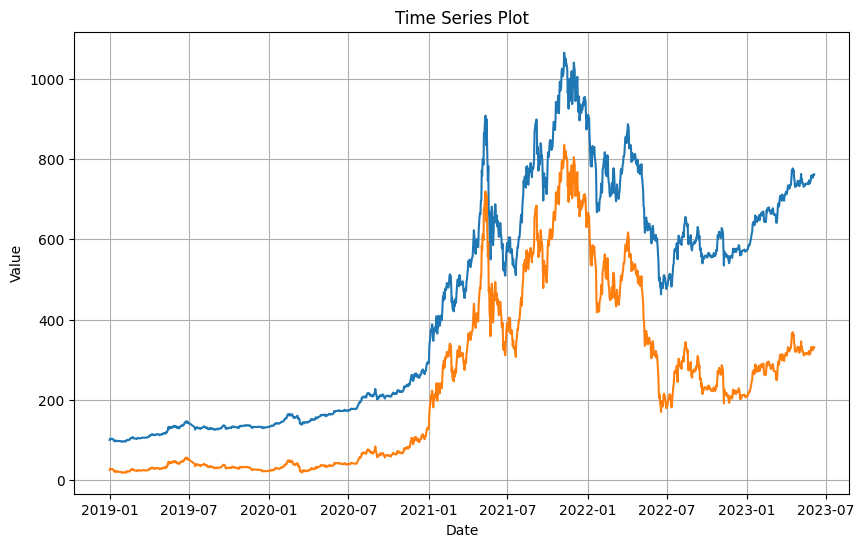

In [13]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Portfolio'], label='Portfolio')
plt.plot(df.index, df['Long Portfolio'], label='Long Portfolio')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:




# REBALANCING ENGINE (change between .year, .month, .day to execute the rebalancing)

# set initial shares on the first day
shares_df.loc[stock_data.index[0], :] = [np.floor((portfolio_value * w) / stock_data[s][0]) for s,w in zip(stocks, weights)]

# initialize variables
balance_year = stock_data.index[0].year
signal = False
count = 0    # for loop count purpose

# Store previous values in a dictionary
prev_values = {}

# Calculate portfolio value for the first day
portfolio_value = sum([shares_df.loc[stock_data.index[0], s + '_shares'] * stock_data.loc[stock_data.index[0], s] for s in stocks])

for day in stock_data.index:
    count += 1
    if day == stock_data.index[0]:
        shares_df.loc[day] = shares_df.loc[day] # First day

        # Store initial values as previous values
        for col in shares_df.columns:
            prev_values[col] = shares_df.loc[day, col]


    elif day.year != balance_year:
        signal = True
        # calculate new shares based on the new portfolio value and weights
        new_shares = [np.floor((portfolio_value * w) / stock_data[s][day]) for s,w in zip(stocks, weights)]
        shares_df.loc[day, :] = new_shares
        balance_year = day.year
        count += 1
        # print(f'Rebalance: {day.date()}, count: {count}') # uncomment to debug days ;)
        # Store new values as previous values
        for col in shares_df.columns:
            prev_values[col] = shares_df.loc[day, col]

    else:

        signal = False

        # Use previous values if it is not a rebalancing date
        shares_df.loc[day, :] = [prev_values[col] for col in shares_df.columns]
        
        # print(f'Not rebalance, regular day: {day.date()}') # uncomment to debug days ;)



    # Calculate asset values and portfolio value for the current day
    asset_values = [shares_df.loc[day, s + '_shares'] * stock_data.loc[day, s] for s in stocks]
    portfolio_value = sum(asset_values)
    
    stock_data.loc[day, 'Signal'] = signal
    stock_data.loc[day, 'Portfolio_Value'] = portfolio_value
    
    # Add shares to stock data frame
    for s in stocks:
        stock_data.loc[day, s + '_shares'] = shares_df.loc[day, s + '_shares']
        stock_data.loc[day, s + '_value'] = shares_df.loc[day, s + '_shares'] * stock_data.loc[day, s]


NameError: name 'stock_data' is not defined

In [ ]:
# Calculate log returns for portfolio
stock_data['Portfolio_Value_rets'] = np.log(stock_data['Portfolio_Value'] / stock_data['Portfolio_Value'].shift(1))

# Calculate log returns for each stock
for stock in stocks:
    stock_data[f'{stock}_rets'] = np.log(stock_data[stock] / stock_data[stock].shift(1))



In [ ]:
start_date_benchmark = stock_data.index[0]
stock_data = stock_data.dropna()

In [ ]:
# Calculate daily weight per asset
for s in stocks:
    stock_data[s + '_weight'] = stock_data[s + '_value'] / stock_data['Portfolio_Value']

In [ ]:
stock_data.filter(regex='weight')

,SPY_weight,^TNX_weight,TIP_weight,GLD_weight,DBC_weight
Date,,,,,
2010-01-05,0.301159,0.146841,0.401798,0.075028,0.075174
2010-01-06,0.300223,0.148347,0.399234,0.075975,0.076221
2010-01-07,0.301187,0.148742,0.399445,0.075429,0.075197
2010-01-08,0.301703,0.147958,0.399641,0.075681,0.075016
2010-01-11,0.301913,0.148243,0.398483,0.076633,0.074728
...,...,...,...,...,...
2023-05-25,0.317269,0.146010,0.392489,0.076435,0.067798
2023-05-26,0.319517,0.145012,0.390689,0.076296,0.068485
2023-05-30,0.320801,0.141338,0.393675,0.077048,0.067139


In [ ]:
fig = go.Figure()

# Loop through each stock and add a trace for its shares
for stock in stocks:
    fig.add_trace(go.Scatter(x=stock_data.index, y=shares_df[stock+'_shares'], mode='lines', name=stock+'_shares'))

fig.update_layout(title='Shares per day',
                  xaxis_title='Date',
                  yaxis_title='Shares',
                  width=800,
                  height=400)

fig.show()

In [ ]:
fig = go.Figure()

# Loop through each stock and add a trace for its shares
for stock in stocks:
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data[stock + '_weight'], mode='lines', name=stock + '_weight'))

fig.update_layout(title='Weights per day',
                  xaxis_title='Date',
                  yaxis_title='Weights',
                  width=1000,
                  height=600)

fig.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplot layout
fig = make_subplots(rows=2, cols=2, subplot_titles=('Portfolio Returns', 'Asset Returns', 'Shares Holding per Asset', 'Weights per Asset'))

# Add traces to the subplots
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Portfolio_Value_rets'].cumsum(), name='Portfolio'), row=1, col=1)

for s in stocks:
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data[f'{s}_rets'].cumsum(), name=f'{s}'), row=1, col=2)
    fig.add_trace(go.Scatter(x=shares_df.index, y=shares_df[f'{s}_shares'], name=f'{s}'), row=2, col=1)
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data[f'{s}_weight'], name=f'{s}'), row=2, col=2)

# Update subplot layout
fig.update_layout(height=800, width=1200, title='Strategy Overview', showlegend=False)

# Display the plot
fig.show()


### STRATEGY ANALYTICS AND BENCHMARK INTEGRATION
<hr>

In [ ]:
# Benchmark data download and returns
start_date_benchmark = stock_data.index[0]
benchmark_data = yf.download(benchmark, start=start_date_benchmark)
benchmark_data = benchmark_data.dropna()
benchmark_data['benchmark_rets'] = np.log(benchmark_data['Adj Close'] / benchmark_data['Adj Close'].shift(1))
benchmark_data['benchmark_rets'] = benchmark_data['benchmark_rets'].dropna()


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Data timezone unification for pyfolio valuation
stock_data.index = stock_data.index.tz_localize('UTC')
benchmark_data.index = benchmark_data.index.tz_localize('UTC')
live_date = pd.Timestamp(live_date, tz='UTC')

In [ ]:
py.create_full_tear_sheet(stock_data['Portfolio_Value_rets'], benchmark_rets = benchmark_data['benchmark_rets'], live_start_date = live_date)

AttributeError: 'Series' object has no attribute 'iteritems'